# Importation of libraries ,Loading and cleaning of the datasets

In [25]:
import pandas as pd
import numpy as np

from sklearn. pipeline import Pipeline
from sklearn. impute import SimpleImputer
from sklearn. preprocessing import StandardScaler
from sklearn. ensemble import RandomForestClassifier
from sklearn. metrics import classification_report, confusion_matrix, roc_auc_score

In [26]:
raw_df = pd.read_csv("../data/raw_data.csv")
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

### cleaning the raw_df 

In [27]:
raw_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


### check if there are any missing values in the raw_df.

In [28]:
raw_df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

it is seen that there are no null values in the dataset.

### find if there are any duplicated in the dataset.

In [29]:
raw_df.duplicated().sum()

0

there are no duplicates in the dataset
### get to know more about columns and rows in the dataset


In [30]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


this shows that there are 7 columns, 19535 rows in the dataset.it also shows that there are no missing values as shown before.there is only 2 data tyes 2intagers and 5 floates

In [31]:
raw_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


### cleaning the test_df 

In [32]:
test_df .head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,634,2.611260,10.453517,2.771041,75.863640,79.245834,1
1,856,4.043840,5.829366,2.460446,73.860133,71.047078,1
2,814,4.073486,5.257120,1.866571,81.840070,76.715591,0
3,379,2.724639,4.712955,1.981593,77.092260,76.106727,1
4,868,2.672809,5.273917,1.905387,78.475478,72.088361,0


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        3907 non-null   int64  
 1   lub_oil_pressure  3907 non-null   float64
 2   fuel_pressure     3907 non-null   float64
 3   coolant_pressure  3907 non-null   float64
 4   lub_oil_temp      3907 non-null   float64
 5   coolant_temp      3907 non-null   float64
 6   engine_condition  3907 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 213.8 KB


from .info() it is seen that there are no missing values,there are 7 columns, 3907 rows and there is only two datatypes 2 intagers and 5 floats.

In [34]:
test_df.duplicated().sum()

0

it is sen that there are no duplicates in the dataset.
### cleaning the train dataset

In [35]:
train_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,496,4.706240,5.249898,3.803385,75.033607,70.542095,0
1,836,3.960027,4.928546,3.705357,74.395016,84.098307,1
2,623,3.055244,9.494612,2.084725,76.865701,72.927688,0
3,675,2.785797,5.463947,1.649817,75.397279,82.907453,1
4,1412,2.816022,4.001410,1.921522,83.246013,71.176927,1


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15628 entries, 0 to 15627
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        15628 non-null  int64  
 1   lub_oil_pressure  15628 non-null  float64
 2   fuel_pressure     15628 non-null  float64
 3   coolant_pressure  15628 non-null  float64
 4   lub_oil_temp      15628 non-null  float64
 5   coolant_temp      15628 non-null  float64
 6   engine_condition  15628 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 854.8 KB


shows that there are no missing values ,there 7 columns and 15628 rows . there are 2 datatypes 2 intagers and 5 floates

In [37]:
train_df.duplicated().sum()

0

there are no duplicates in the dataset
# analysing raw_data


In [38]:
raw_df['Engine Condition'].value_counts()
raw_df['Engine Condition'].value_counts(normalize=True)

1    0.630509
0    0.369491
Name: Engine Condition, dtype: float64

has a fairly class imbalance
### checking for outliers and distribution of numerical feature

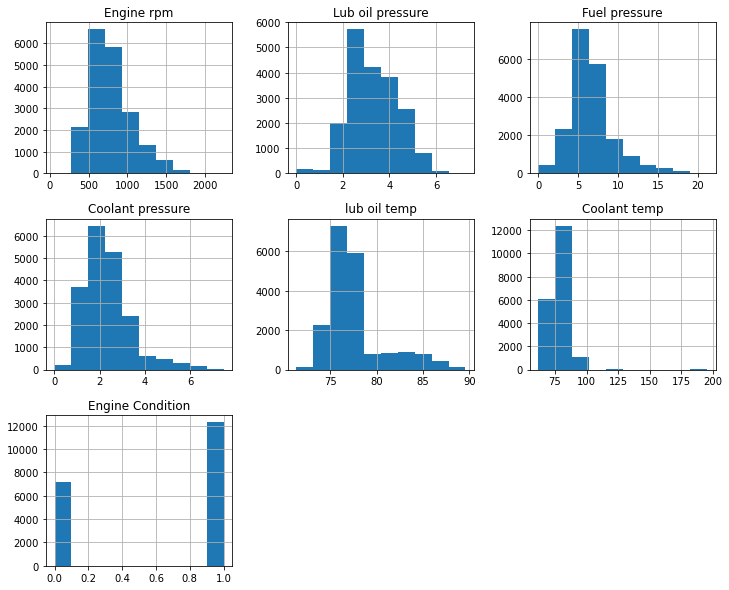

In [39]:
import matplotlib.pyplot as plt

raw_df.hist(figsize=(12,10))
plt.show()

### Engine RPM

Most values are concentrated roughly between 500 – 1200 rpm

Slight right skew (few high rpm values up to ~2000)

No extreme abnormal spikes

Engine operates mostly in a normal operating band. High RPM values may correspond to high load or stress conditions.

## Lubrication Oil Pressure

Most values between 2 – 4

Slight right skew

Few low-pressure values near 0

Low oil pressure can be a strong indicator of engine failure.
You should later check oil pressure vs Engine Condition using boxplots

### Fuel Pressure

Concentrated around 4 – 8

Some extreme values up to 20

Fuel pressure shows some outliers.

 ### Coolant Pressure

Most values between 1 – 4

Slight skew

Some higher outliers

Coolant pressure distribution seems reasonable.
Higher coolant pressure might correlate with overheating events.

### Lub Oil Temperature

Concentrated around 75 – 82°C

Slight right skew

Some values near 90°C

Engine oil temperature appears stable for most samples.
High oil temperatures could be associated with failure events.
### Coolant Temperature

Most values between 70 – 100°C

Some extreme outliers up to 200°C

200°C is unusually high for coolant temperature.

### Engine Condition (Target Variable)
two bars:

0 _No Failure

1 _Failure

1 appears larger than 0

But not extremely imbalanced

Dataset seems moderately balanced.

# separating the features and the targets

In [41]:
X_train = train_df.drop(columns="engine_condition")
y_train = train_df["engine_condition"]

X_test = test_df.drop(columns="engine_condition")
y_test = test_df["engine_condition"]

 not going to do the train-test split since we have the train and test sets.in this case we will use the train dataset for training of the models and the test data for model evaluation and finaly we will also use the raw dataset for EDA.

# checking if there is any class imbalances

In [42]:
y_train.value_counts(normalize=True)

1    0.630535
0    0.369465
Name: engine_condition, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

1    0.630407
0    0.369593
Name: engine_condition, dtype: float64

this shows that the datasets are fairly balanced. it also shows that that failure is more common than the healthy engines since 1 has a higher percentage of 63% than 0 which is 36%

# model
# random forest
### building the random forest pipeline.

In [44]:
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(class_weight="balanced",random_state=42))

])

### training the model on train dataset

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

### making predictions

In [46]:
y_pred= pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]


### evaluation of the model

In [47]:
print("y_test unique values:", np.unique(y_test))
print("y_pred unique values"), np.unique(y_pred)

y_test unique values: [0 1]
y_pred unique values


(None, array([0, 1], dtype=int64))

In [48]:
y_pred = y_pred.astype(int)

In [49]:

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_prob,))

              precision    recall  f1-score   support

           0       0.53      0.36      0.43      1444
           1       0.69      0.81      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907

[[ 523  921]
 [ 460 2003]]
0.673374670890959


the model is accurate 65% ,recall can detect 81% of the fails and the precision 69% of the time the failier predictions are true and also a high f1-score of 74%.
523 pedictions of 0 are true,921 predictions of 0 but actual is 1, 460 predicts 1 but actual 0, 2003 predicts 1 which is true. this is a good model.


### XGBoost

In [50]:
from xgboost import XGBClassifier

# creating the xgboost pipeline

In [51]:
xgb_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("model", XGBClassifier(
        scale_pos_weight = len(y_train[y_train==0])/ len(y_train[y_train==1]),
        eval_metric='logloss',
        random_state=42 
    ))
])# does not need scaling

# training of the model

In [52]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=0.5859549421554698, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

### predictions

In [53]:
xgb_preds = xgb_pipe.predict(X_test)

### model evaluation

In [54]:
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))
print(roc_auc_score(y_test, xgb_pipe.predict_proba(X_test)[:, 1]))

[[ 900  544]
 [ 883 1580]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.56      1444
           1       0.74      0.64      0.69      2463

    accuracy                           0.63      3907
   macro avg       0.62      0.63      0.62      3907
weighted avg       0.66      0.63      0.64      3907

0.6780450388745117


it has an accuracy of 63%,from recall the model detects 64% of failures from precision when predicts a failier it is correct 74% of the time.has an f1_score of 69%
1580 shows that it correctly predict a fail, 544 actual fail but predicted as 0, 883 an actual 0 but predicted as a fail,900 correctly predicted as 0. it is also a good model
### hyperparameter tuning 


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid_xgb = {
    'model_n_estimators': [100, 200],
    'model_max_depth': [3,5,7],
    'model_learning_rate': [0.01, 0.1, 0.2],
    'model_subsample': [0.8, 1.0]
}
#  parameter grid 

In [57]:
grid_xgb = GridSearchCV(
    xgb_pipe,
    param_grid_xgb,
    cv=5,
    scoring='recall',
    n_jobs=-1
) # creating grid search object

### fitting the training data

In [58]:
grid_xgb.fit(X_train, y_train)

ValueError: Invalid parameter model_learning_rate for estimator Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=0.5859549421554698, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))]). Check the list of available parameters with `estimator.get_params().keys()`.